In [30]:
import os
%load_ext autoreload
%autoreload 2
import seaborn as sns
import pandas as pd
from toolsets.setup import set_workspace, get_dirs
from feature_normalization.rt_normalization import rt_normalization
from toolsets.feature_alignment import initilize_pmz_rt_list, align, find_istd
from toolsets.file_io import get_file_list
from toolsets.search import quick_search_values, string_search
from toolsets.feature_alignment import get_alignemnt
master_dir = '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/H2Lv2_neg'

set_workspace(master_dir)
# this is the master workspace, all other directories will be created within this workspace
dirs =get_dirs(master_dir, mode='neg')
# a lot of data are mode specific, so make sure to include 'mode' argument in there

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
the workspace exists!
set up complete
at position 0:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/H2Lv2_neg/alignment_result/neg
at position 1:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/H2Lv2_neg/bioactivity
at position 2:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/H2Lv2_neg/mzml/neg
at position 3:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/H2Lv2_neg/normalized_peak_list/neg
at position 4:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/H2Lv2_neg/peak_list/neg
at position 5:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/H2Lv2_neg/results/neg
at position 6:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/H2Lv2_neg/sirius_files/neg
at position 7:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/H2Lv2_neg/uv_data
at position 8:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/H2Lv2_neg/nmr_data


In [10]:
from feature_normalization.rt_normalization import rt_normalization

In [20]:
istd_info_name = 'istd_info.csv'
istd_info = pd.read_csv(os.path.join(master_dir, istd_info_name))

In [21]:
istd_info

,compound_name,mono_mass,RT_suggested,Precursor m/z
0,C4-APS,215.061614,0.99,214.0544
1,C5-APS,229.077265,2.06,228.0700
2,C6-APS,243.092915,2.79,242.0857
3,C7-APS,257.108565,3.43,256.1014
4,C8-APS,271.124215,3.98,270.1169
5,C9-APS,285.139865,4.46,284.1327
6,C10-APS,299.155515,4.89,298.1482
7,C11-APS,313.171165,5.28,312.1640
8,C12-APS,327.186815,5.67,326.1798
9,C13-APS,341.202465,6.05,340.1956


In [22]:
rt_normalization(peak_list_dir = dirs[4], rt_seed = 'QC_Pool1_N.txt', istd_info=istd_info, normalized_peak_list_dir=dirs[3], result_dir=dirs[5])

100%|██████████| 64/64 [01:17<00:00,  1.22s/it]


In [25]:
alignment= get_alignemnt(dirs[3], istd_info,save_path=dirs[0],mode = 'inclusive')

mode =  inclusive
there is qc, will construct master mz-rt list based on features present in all qcs
starting to construct master mz-rt list


100%|██████████| 5/5 [01:51<00:00, 22.39s/it]


master mz-rt list done, there is 37108 features in master list!
aligning features


100%|██████████| 64/64 [02:48<00:00,  2.63s/it]


extracting spectra from peak_list


100%|██████████| 64/64 [01:32<00:00,  1.45s/it]


In [26]:
alignment

,pmz,rt,max_peak_height,msms,ms1,reference_file,C18_X3_N,Blank_02_N,Blank_04_N,Blank_06_N,...,Si_X9_N,Si_X10_N,Si_X11_N,Si_X12_N,Si_X13_N,Si_X14_N,Si_X15_N,Si_X16_N,Si_X17_N,Si_X18_N
0,1272.5650,0.197798,1100,759.64203\t11391,1272.41895\t0\n1272.44332\t0\n1272.46769\t0\n1...,QC_Pool4_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,305.3871,0.325327,1032,107.67025\t8785\n120.35902\t9094\n121.37551\t9...,305.36702\t0\n305.36988\t0\n305.37274\t0\n305....,QC_Pool4_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,275.9042,0.546169,1153,NaN,275.88948\t0\n275.89194\t0\n275.8944\t0\n275.9...,QC_Pool4_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,458.9708,0.546169,4578,NaN,458.92853\t0\n458.93381\t0\n458.93908\t0\n458....,QC_Pool4_N,1017,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,626.9406,0.546169,4760,NaN,626.88163\t0\n626.89005\t0\n626.89848\t0\n626....,QC_Pool4_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32656,376.8993,9.269421,18556,NaN,376.86791\t0\n376.87184\t0\n376.87576\t0\n376....,Si_X18_N,0,10912,0,0,...,0,0,0,15015,0,0,0,0,0,18556
32657,533.7915,9.269421,2834,NaN,533.74519\t0\n533.75181\t0\n533.75843\t0\n533....,Si_X18_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2834
32658,486.8595,9.353514,2387,NaN,486.82487\t0\n486.83063\t0\n486.8364\t0\n486.8...,Si_X18_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2387
32659,557.0350,9.549809,2022,NaN,556.9927\t0\n556.99976\t0\n557.00681\t0\n557.0...,Si_X18_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022


In [27]:
from toolsets.biodata import find_edge, biodata_prep
bio_dir = dirs[1]
bio_data = pd.read_csv(os.path.join(bio_dir, 'H2L000022-1 Bioactivity - E.coli.csv'))
bio_data_processed =biodata_prep(bio_data)

In [28]:
bio_data_processed

,Well Number,mix,OD600-1,OD600-2,Average,Stdev,average_adjusted,pos_p_value,neg_p_value,peak_label
0,A1,LH20_X1,1.519,1.510,1.515,0.006,0.000,0.000208,0.929893,False
1,A2,LH20_X2,1.468,1.272,1.370,0.139,0.000,0.000539,0.847887,False
2,A3,LH20_X3,1.622,1.231,1.427,0.276,0.000,0.000433,0.881982,False
3,A4,LH20_X4,1.401,1.462,1.432,0.043,0.000,0.000350,0.889574,False
4,A5,LH20_X5,1.601,1.238,1.420,0.257,0.000,0.000441,0.878386,False
5,A6,LH20_X6,1.701,1.132,1.417,0.402,0.000,0.000558,0.870646,False
6,A7,LH20_X7,1.909,1.131,1.520,0.550,0.000,0.000406,0.916874,False
7,A8,LH20_X8,1.742,1.376,1.559,0.259,0.000,0.000189,0.942623,False
8,A9,LH20_X9,0.050,0.075,0.063,0.018,1.854,0.661295,0.002421,True
9,A10,LH20_X10,0.052,0.046,0.049,0.004,1.868,0.678409,0.002220,True


<Axes: xlabel='mix', ylabel='average_adjusted'>

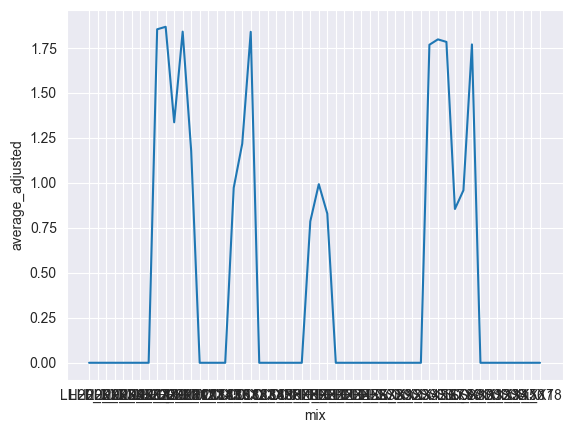

In [31]:
sns.lineplot(x = bio_data_processed['mix'], y = bio_data_processed['average_adjusted'])

In [33]:
alignment

,pmz,rt,max_peak_height,msms,ms1,reference_file,C18_X3_N,Blank_02_N,Blank_04_N,Blank_06_N,...,Si_X9_N,Si_X10_N,Si_X11_N,Si_X12_N,Si_X13_N,Si_X14_N,Si_X15_N,Si_X16_N,Si_X17_N,Si_X18_N
0,1272.5650,0.197798,1100,759.64203\t11391,1272.41895\t0\n1272.44332\t0\n1272.46769\t0\n1...,QC_Pool4_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,305.3871,0.325327,1032,107.67025\t8785\n120.35902\t9094\n121.37551\t9...,305.36702\t0\n305.36988\t0\n305.37274\t0\n305....,QC_Pool4_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,275.9042,0.546169,1153,NaN,275.88948\t0\n275.89194\t0\n275.8944\t0\n275.9...,QC_Pool4_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,458.9708,0.546169,4578,NaN,458.92853\t0\n458.93381\t0\n458.93908\t0\n458....,QC_Pool4_N,1017,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,626.9406,0.546169,4760,NaN,626.88163\t0\n626.89005\t0\n626.89848\t0\n626....,QC_Pool4_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32656,376.8993,9.269421,18556,NaN,376.86791\t0\n376.87184\t0\n376.87576\t0\n376....,Si_X18_N,0,10912,0,0,...,0,0,0,15015,0,0,0,0,0,18556
32657,533.7915,9.269421,2834,NaN,533.74519\t0\n533.75181\t0\n533.75843\t0\n533....,Si_X18_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2834
32658,486.8595,9.353514,2387,NaN,486.82487\t0\n486.83063\t0\n486.8364\t0\n486.8...,Si_X18_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2387
32659,557.0350,9.549809,2022,NaN,556.9927\t0\n556.99976\t0\n557.00681\t0\n557.0...,Si_X18_N,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022


In [34]:
bio_data_processed

,Well Number,mix,OD600-1,OD600-2,Average,Stdev,average_adjusted,pos_p_value,neg_p_value,peak_label
0,A1,LH20_X1,1.519,1.510,1.515,0.006,0.000,0.000208,0.929893,False
1,A2,LH20_X2,1.468,1.272,1.370,0.139,0.000,0.000539,0.847887,False
2,A3,LH20_X3,1.622,1.231,1.427,0.276,0.000,0.000433,0.881982,False
3,A4,LH20_X4,1.401,1.462,1.432,0.043,0.000,0.000350,0.889574,False
4,A5,LH20_X5,1.601,1.238,1.420,0.257,0.000,0.000441,0.878386,False
5,A6,LH20_X6,1.701,1.132,1.417,0.402,0.000,0.000558,0.870646,False
6,A7,LH20_X7,1.909,1.131,1.520,0.550,0.000,0.000406,0.916874,False
7,A8,LH20_X8,1.742,1.376,1.559,0.259,0.000,0.000189,0.942623,False
8,A9,LH20_X9,0.050,0.075,0.063,0.018,1.854,0.661295,0.002421,True
9,A10,LH20_X10,0.052,0.046,0.049,0.004,1.868,0.678409,0.002220,True


In [37]:
from toolsets.biodata import rank_features
correlation_result = rank_features(alignment, bio_data_processed, mode = 'neg')

100%|██████████| 32661/32661 [00:11<00:00, 2739.96it/s]


In [38]:
correlation_result

,rank,score,pmz,rt,correlation,max_values,p_values,max_peak_height,msms,ms1,...,Si_X9_N,Si_X10_N,Si_X11_N,Si_X12_N,Si_X13_N,Si_X14_N,Si_X15_N,Si_X16_N,Si_X17_N,Si_X18_N
0,0,0.843715,277.0544,2.032565,0.862759,13383594,5.034026e-17,13383594,72.72683\t9168\n72.99257\t23021\n78.7217\t9743...,276.9854\t0\n276.98787\t0\n276.99035\t0\n276.9...,...,5935944,5509247,1893453,0,0,0,0,0,0,0
1,1,0.757517,379.0494,1.993461,0.822915,5108530,2.266844e-14,5108530,111.25673\t5753\n114.99564\t9473\n115.00281\t1...,378.97079\t0\n378.97475\t0\n378.97871\t0\n378....,...,1887911,2635945,2089247,11359,0,0,0,0,0,0
2,2,0.726169,527.0888,1.769918,0.849515,1695582,4.655121e-16,1695582,147.02901\t269703\n148.87102\t6985\n263.03958\...,526.95288\t0\n526.95937\t0\n526.96587\t0\n526....,...,450410,0,0,0,0,0,0,0,0,0
3,3,0.692598,393.0680,2.412059,0.724370,9285103,5.967023e-10,9285103,109.61829\t5086\n114.99408\t11472\n115.00317\t...,392.913\t0\n392.91718\t0\n392.92136\t0\n392.92...,...,0,1222543,385978,0,0,0,0,0,0,0
4,4,0.672040,133.0132,0.564739,0.672040,19383326,2.635803e-08,19383326,41.00279\t54555\n43.01841\t443930\n43.02071\t2...,132.916\t0\n132.91682\t0\n132.91765\t0\n132.92...,...,15257296,11756076,5563824,2506243,2071052,160218,154552,76056,64757,72587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21231,21231,-0.391806,187.9402,0.539264,-0.573963,94328,5.693222e-06,94328,NaN,187.92628\t0\n187.92767\t0\n187.92905\t0\n187....,...,0,0,0,31074,51960,26866,27694,25669,23796,23299
21232,21232,-0.406786,455.0110,2.252671,-0.654552,33801,7.932086e-08,40145,NaN,454.94282\t0\n454.94803\t0\n454.95324\t0\n454....,...,0,0,0,3247,9314,11366,33059,28060,32611,19275
21233,21233,-0.420808,390.8680,0.546169,-0.644272,57518,1.467088e-07,57518,NaN,390.8302\t0\n390.83435\t0\n390.8385\t0\n390.86...,...,2449,0,0,24042,38179,31324,32890,28107,32977,27121
21234,21234,-0.426244,274.0731,2.124073,-0.758290,12484,3.120683e-11,12484,NaN,274.05589\t0\n274.05833\t0\n274.06076\t0\n274....,...,4223,1458,2134,8770,9332,9749,8217,9552,9361,8675


<Axes: ylabel='Density'>

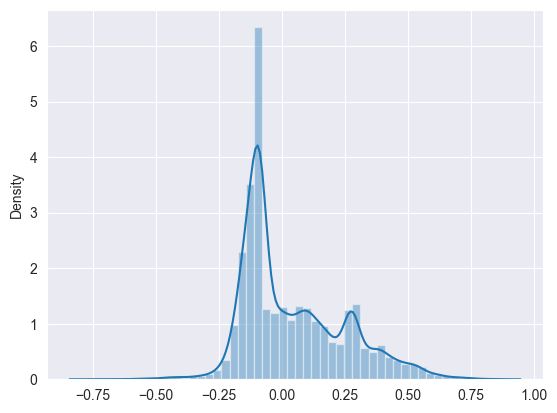

In [40]:
sns.distplot(x = correlation_result['correlation'])

<Axes: ylabel='Density'>

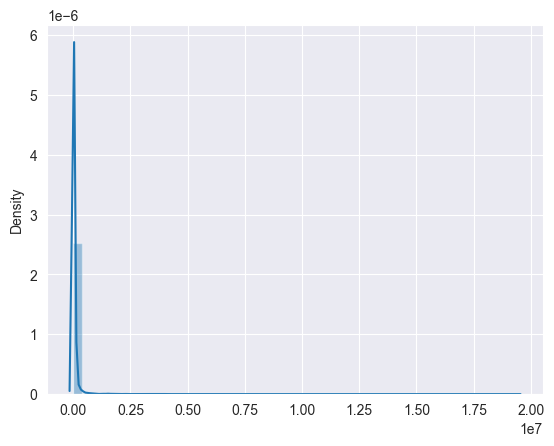

In [42]:
sns.distplot(x = correlation_result['max_values'])

In [43]:
from toolsets.biodata import bioactivity_figs, bioacitivity_figs_batch

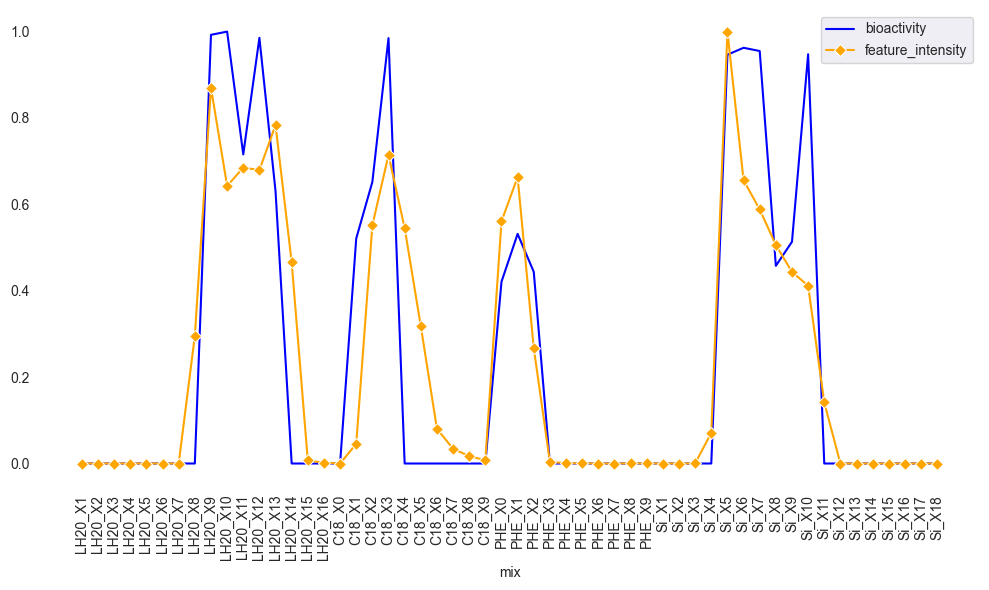

In [45]:
rank = 0
bioactivity_figs(correlation_result, bio_data_processed, rank, save_dir=dirs[5], mode = 'neg')

# generating figures in batch mode

In [47]:
topn =100
bioacitivity_figs_batch(correlation_result, bio_data_processed, top_n=topn, save_dir=dirs[5], mode = 'neg')